<a href="https://colab.research.google.com/github/mateuszGrabiec/175-IC-machine-lerning/blob/main/Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.datasets import make_blobs

data, _ = make_blobs(n_samples=1000, centers=4, cluster_std=1.65,random_state=343)
df = pd.DataFrame(data, columns=['x1','x2'])
px.scatter(df,'x1','x2')

In [76]:
from sklearn.cluster import DBSCAN

cluster = DBSCAN(eps=0.05,min_samples=3)
cluster.fit(data)
df['cluster'] = cluster.labels_
print(df['cluster'].value_counts())
px.scatter(df,'x1','x2','cluster',color_continuous_midpoint=0)
# przy skrajnie niskiej wartości próbkowania większosć może zostać przydzielone do jednego klastra

-1    991
 1      3
 2      3
 0      3
Name: cluster, dtype: int64


In [77]:
# Dopasuj epsilon i min_samples w taki sposób, by jak najmniej elementów zostało sklasyfikowanych jako outlier point
from sklearn.cluster import DBSCAN

cluster = DBSCAN(eps=0.7,min_samples=8)
cluster.fit(data)
df['cluster'] = cluster.labels_
px.scatter(df,'x1','x2','cluster',color_continuous_midpoint=0)

Text(0.5, 1.0, 'No Clusters Assigned')

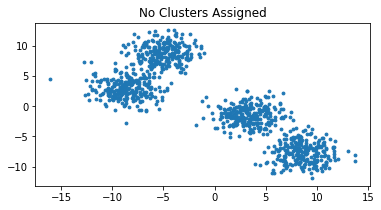

In [78]:
# Implementacja kMeans
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
plt.scatter(df['x1'], df['x2'], s=8)
plt.title(f"No Clusters Assigned")

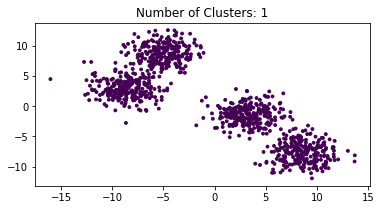

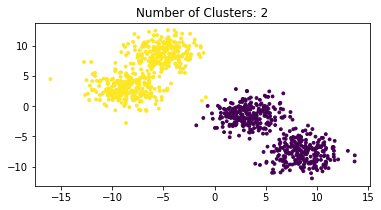

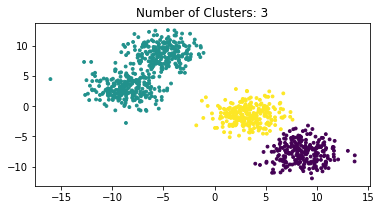

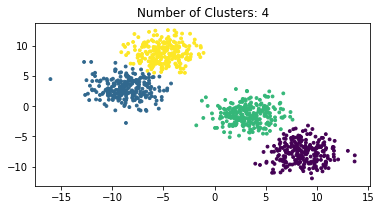

In [79]:
# changing the number of clusters 
for i in range(1,5):
    plt.figure(figsize=(6, 3))
    
    # Predicting the clusters
    y_pred = KMeans(n_clusters=i, random_state=343).fit_predict(X)
# plotting the clusters
    plt.scatter(df['x1'], df['x2'], c=y_pred, s=8)
    plt.title(f"Number of Clusters: {i}")
plt.show();

In [80]:
# Po działaniu obu algorytmów porównaj dokładność ich działania. Stwórz funkcję, która porówna nam klastry przypisane przez algorytm i te przypisane przy generowaniu dzięki make_blobs.
# Formatowanie y_pred do DataFrame aby porównać
results = pd.DataFrame([df.index,y_pred]).T
print('Wynik Kmeans\n')
print(results[1].value_counts())
print('\nWynik DBSCAN\n')
print(df['cluster'].value_counts())
# Jak widzimy z 3cia klasa zamieniła się z 1szą, jednak przy Kmeans wszystkie punkty są przydzielone do klastra

Wynik Kmeans

1    255
0    251
2    249
3    245
Name: 1, dtype: int64

Wynik DBSCAN

 3    214
 0    207
 2    206
 1    204
-1    169
Name: cluster, dtype: int64
